# Setup

In [1]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [2]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

# Load data



In [3]:
%%R -o mtcars

library(tidyverse)

mtcars

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
                     mpg cyl  disp  hp drat    wt  qsec vs am gear carb
Mazda RX4           21.0   6 160.0 110 3.90 2.620 16.46  0  1    4    4
Mazda RX4 Wag       21.0   6 160.0 110 3.90 2.875 17.02  0  1    4    4
Datsun 710          22.8   4 108.0  93 3.85 2.320 18.61  1  1    4    1
Hornet 4 Drive      21.4   6 258.0 110 3.08 3.215 19.44  1  0    3    1
Hornet Sportabout   18.7   8 360.0 175 3.15 3.440 17.02  0  0    3    2
Valiant             18.1   6 225.0 105 2.76 

# Exploratory Data Analysis

In [4]:
%%R 

# correlation matrix of mtcars
cor(mtcars) %>% round(2)

       mpg   cyl  disp    hp  drat    wt  qsec    vs    am  gear  carb
mpg   1.00 -0.85 -0.85 -0.78  0.68 -0.87  0.42  0.66  0.60  0.48 -0.55
cyl  -0.85  1.00  0.90  0.83 -0.70  0.78 -0.59 -0.81 -0.52 -0.49  0.53
disp -0.85  0.90  1.00  0.79 -0.71  0.89 -0.43 -0.71 -0.59 -0.56  0.39
hp   -0.78  0.83  0.79  1.00 -0.45  0.66 -0.71 -0.72 -0.24 -0.13  0.75
drat  0.68 -0.70 -0.71 -0.45  1.00 -0.71  0.09  0.44  0.71  0.70 -0.09
wt   -0.87  0.78  0.89  0.66 -0.71  1.00 -0.17 -0.55 -0.69 -0.58  0.43
qsec  0.42 -0.59 -0.43 -0.71  0.09 -0.17  1.00  0.74 -0.23 -0.21 -0.66
vs    0.66 -0.81 -0.71 -0.72  0.44 -0.55  0.74  1.00  0.17  0.21 -0.57
am    0.60 -0.52 -0.59 -0.24  0.71 -0.69 -0.23  0.17  1.00  0.79  0.06
gear  0.48 -0.49 -0.56 -0.13  0.70 -0.58 -0.21  0.21  0.79  1.00  0.27
carb -0.55  0.53  0.39  0.75 -0.09  0.43 -0.66 -0.57  0.06  0.27  1.00


--- Please select a CRAN mirror for use in this session ---
Secure CRAN mirrors 

 1: 0-Cloud [https]
 2: Australia (Canberra) [https]
 3: Australia (Melbourne 1) [https]
 4: Australia (Melbourne 2) [https]
 5: Austria (Wien 1) [https]
 6: Belgium (Brussels) [https]
 7: Brazil (PR) [https]
 8: Brazil (SP 1) [https]
 9: Brazil (SP 2) [https]
10: Bulgaria [https]
11: Canada (MB) [https]
12: Canada (ON 1) [https]
13: Canada (ON 2) [https]
14: Chile (Santiago) [https]
15: China (Beijing 2) [https]
16: China (Beijing 3) [https]
17: China (Hefei) [https]
18: China (Hong Kong) [https]
19: China (Jinan) [https]
20: China (Lanzhou) [https]
21: China (Nanjing) [https]
22: China (Shanghai 2) [https]
23: China (Shenzhen) [https]
24: China (Wuhan) [https]
25: Colombia (Cali) [https]
26: Costa Rica [https]
27: Cyprus [https]
28: Czech Republic [https]
29: Denmark [https]
30: East Asia [https]
31: Ecuador (Cuenca) [https]
32: France (Lyon 1) [https]
33: France (Lyon 2) [https]
34: France (Paris 1) [h

Selection:  66



The downloaded binary packages are in
	/var/folders/0r/3hq37j6n1rn7g4x45s4dx9_m0000gn/T//RtmpE5VblU/downloaded_packages


trying URL 'https://repo.miserver.it.umich.edu/cran/bin/macosx/big-sur-arm64/contrib/4.4/corrplot_0.95.tgz'
Content type 'application/octet-stream' length 3827116 bytes (3.6 MB)
downloaded 3.6 MB

corrplot 0.95 loaded
In addition: Warning message:
In doTryCatch(return(expr), name, parentenv, handler) :
  unable to load shared object '/Library/Frameworks/R.framework/Resources/modules//R_X11.so':
  dlopen(/Library/Frameworks/R.framework/Resources/modules//R_X11.so, 0x0006): Library not loaded: /opt/X11/lib/libSM.6.dylib
  Referenced from: <34C5A480-1AC4-30DF-83C9-30A913FC042E> /Library/Frameworks/R.framework/Versions/4.4-arm64/Resources/modules/R_X11.so
  Reason: tried: '/opt/X11/lib/libSM.6.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/X11/lib/libSM.6.dylib' (no such file), '/opt/X11/lib/libSM.6.dylib' (no such file), '/usr/local/lib/libSM.6.dylib' (no such file), '/usr/lib/libSM.6.dylib' (no such file, not in dyld cache)


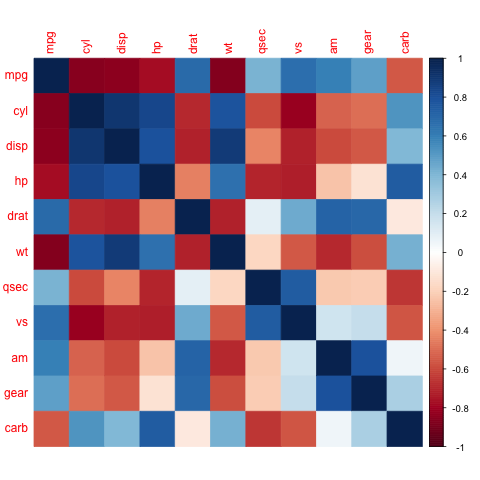

In [7]:
%%R 

install.packages("corrplot")

# correlation plot of mtcars
library(corrplot)

corrplot(cor(mtcars), method = "color")

In [8]:
%%R 

# pivot mtcars from wide to long using pivot_longer on all columns except the index
mtcars_long <- mtcars %>%
    rownames_to_column(var = "model") %>% # convert rownames (index) to a regular column %>% 
    pivot_longer(cols = -c(model, mpg), names_to = "variable", values_to = "value") 

mtcars_long

# A tibble: 320 × 4
   model       mpg variable  value
   <chr>     <dbl> <chr>     <dbl>
 1 Mazda RX4    21 cyl        6   
 2 Mazda RX4    21 disp     160   
 3 Mazda RX4    21 hp       110   
 4 Mazda RX4    21 drat       3.9 
 5 Mazda RX4    21 wt         2.62
 6 Mazda RX4    21 qsec      16.5 
 7 Mazda RX4    21 vs         0   
 8 Mazda RX4    21 am         1   
 9 Mazda RX4    21 gear       4   
10 Mazda RX4    21 carb       4   
# ℹ 310 more rows
# ℹ Use `print(n = ...)` to see more rows


`geom_smooth()` using formula = 'y ~ x'


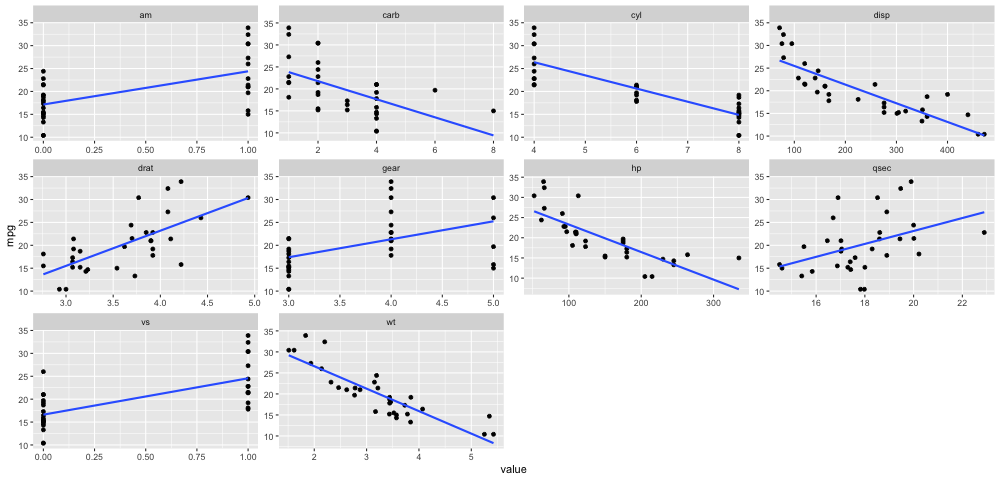

In [9]:
%%R -w 1000

ggplot(mtcars_long) +
        aes(x=value, y=mpg) +
        geom_point() + 
        geom_smooth(method = "lm", se=F) +
        facet_wrap(~variable, scales = "free") 

# Regression model

## Run a linear model with `lm` 

In [10]:
%%R 

model <- lm(mpg ~ wt, data = mtcars) 
model


Call:
lm(formula = mpg ~ wt, data = mtcars)

Coefficients:
(Intercept)           wt  
     37.285       -5.344  



## Look at the summary of how the model fits the data with `summary`

In [11]:
%%R 

summary(model)


Call:
lm(formula = mpg ~ wt, data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.5432 -2.3647 -0.1252  1.4096  6.8727 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  37.2851     1.8776  19.858  < 2e-16 ***
wt           -5.3445     0.5591  -9.559 1.29e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.046 on 30 degrees of freedom
Multiple R-squared:  0.7528,	Adjusted R-squared:  0.7446 
F-statistic: 91.38 on 1 and 30 DF,  p-value: 1.294e-10



## Plot a linear model with `geom_smooth(method='lm')`

`geom_smooth()` using formula = 'y ~ x'


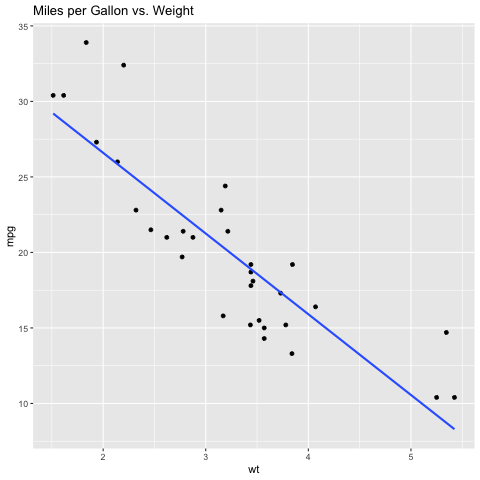

In [12]:
%%R 

ggplot(mtcars) + 
    aes(x = wt, y = mpg) + 
    geom_point() + 
    geom_smooth(method = "lm", se=F) + # <--- geom_smooth fits a line to the data
    labs(title = "Miles per Gallon vs. Weight")

## Get the predictions with `predict`

Predictions are the Y point on the regression line for any given X

In [13]:
%%R 

# get model predictions
mtcars$preicted_mpg <- predict(model)

# view selected columns
mtcars %>% select(wt, mpg, preicted_mpg)

                       wt  mpg preicted_mpg
Mazda RX4           2.620 21.0    23.282611
Mazda RX4 Wag       2.875 21.0    21.919770
Datsun 710          2.320 22.8    24.885952
Hornet 4 Drive      3.215 21.4    20.102650
Hornet Sportabout   3.440 18.7    18.900144
Valiant             3.460 18.1    18.793255
Duster 360          3.570 14.3    18.205363
Merc 240D           3.190 24.4    20.236262
Merc 230            3.150 22.8    20.450041
Merc 280            3.440 19.2    18.900144
Merc 280C           3.440 17.8    18.900144
Merc 450SE          4.070 16.4    15.533127
Merc 450SL          3.730 17.3    17.350247
Merc 450SLC         3.780 15.2    17.083024
Cadillac Fleetwood  5.250 10.4     9.226650
Lincoln Continental 5.424 10.4     8.296712
Chrysler Imperial   5.345 14.7     8.718926
Fiat 128            2.200 32.4    25.527289
Honda Civic         1.615 30.4    28.653805
Toyota Corolla      1.835 33.9    27.478021
Toyota Corona       2.465 21.5    24.111004
Dodge Challenger    3.520 15.5  

# Get the residuals with `resid`

In [14]:
%%R 

# get model residuals
mtcars$residuals <- resid(model)

# view selected columns
mtcars %>% 
    select(wt, mpg, preicted_mpg, residuals) %>% 
    arrange(residuals)

                       wt  mpg preicted_mpg  residuals
Ford Pantera L      3.170 15.8    20.343151 -4.5431513
Duster 360          3.570 14.3    18.205363 -3.9053627
AMC Javelin         3.435 15.2    18.926866 -3.7268663
Camaro Z28          3.840 13.3    16.762355 -3.4623553
Maserati Bora       3.570 15.0    18.205363 -3.2053627
Dodge Challenger    3.520 15.5    18.472586 -2.9725862
Ferrari Dino        2.770 19.7    22.480940 -2.7809399
Toyota Corona       2.465 21.5    24.111004 -2.6110037
Mazda RX4           2.620 21.0    23.282611 -2.2826106
Datsun 710          2.320 22.8    24.885952 -2.0859521
Merc 450SLC         3.780 15.2    17.083024 -1.8830236
Merc 280C           3.440 17.8    18.900144 -1.1001440
Volvo 142E          2.780 21.4    22.427495 -1.0274952
Mazda RX4 Wag       2.875 21.0    21.919770 -0.9197704
Valiant             3.460 18.1    18.793255 -0.6932545
Hornet Sportabout   3.440 18.7    18.900144 -0.2001440
Merc 450SL          3.730 17.3    17.350247 -0.0502472
Porsche 91

Plot the residuals with a standard plot in ggplot

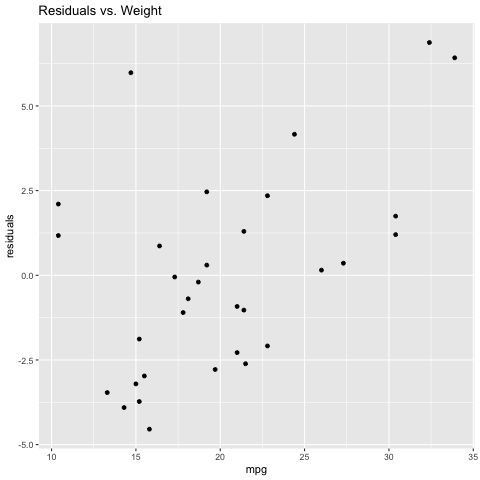

In [15]:
%%R 

# plot residuals
ggplot(mtcars) + 
    aes(x = mpg, y = residuals) + 
    geom_point() + 
    labs(title = "Residuals vs. Weight")